<a href="https://colab.research.google.com/github/copysb/university/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
# Библиотека необходимая для использования слайдера
!pip install -q ipympl

In [57]:
# Линейная регрессия
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np

# Построения графиков
from matplotlib.widgets import Slider
import matplotlib.pyplot as plt
%matplotlib widget

In [58]:
# Разраешение на создание виджитов
from google.colab import output
output.enable_custom_widget_manager()

# Пример линейной регрессии

In [59]:
points_count = 100
data = (np.random.rand(points_count) * 10 + 5).cumsum()
secret_param = np.random.rand() * 0.6 + 0.2
y = np.random.rand(points_count)*100 - 50 + data * secret_param


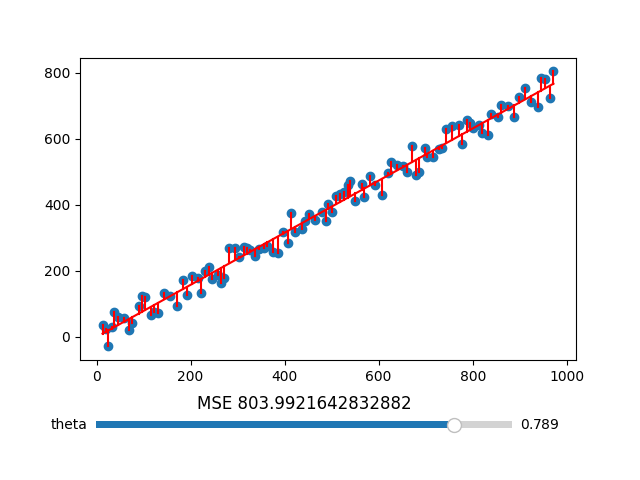

In [60]:
theta = secret_param
fig, ax = plt.subplots()

line, = plt.plot(data, data * theta, c = 'red')

lines = []
for i, d in enumerate(data):
  lines.append(plt.plot([d, d], [y[i], d * theta], c = 'red')[0])

plt.scatter(data, y)

plt.subplots_adjust(bottom=0.25)

axmu = plt.axes([0.15, 0.1, 0.65, 0.03])
lambda_slider = Slider(
    ax=axmu,
    label="theta",
    valmin=0.1,
    valmax=0.9,
    valinit=theta,
    orientation="horizontal"
)

mse = np.power(data * theta - y, 2).mean()
plt.title(f"MSE {mse}")

def update(val):
  theta = val
  line.set_ydata(data * theta)

  for i, (l, d) in enumerate(zip(lines, data)):
    l.set_ydata([y[i], d * theta])

  mse = np.power(data * theta - y, 2).mean()
  plt.title(f"MSE {mse}")
lambda_slider.on_changed(update)

plt.show()

In [61]:
# Отключение создания виджитов
from google.colab import output
output.disable_custom_widget_manager()

# Домашнее задание

In [62]:
%matplotlib inline

In [63]:
# Get data

df = pd.read_csv('/content/drive/MyDrive/Копия Копия lab_1_control_6.csv')
df.head()

,Unnamed: 0,feat_0,feat_1,feat_2,target
0,0,0.838203,2.868490,2.975368,124.660062
1,1,1.661107,9.126586,8.197615,301.240706
2,2,4.798313,13.839245,10.879765,549.736513
3,3,5.225099,17.785758,14.716217,668.971181
4,4,8.315839,24.722703,17.790141,923.695253


In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
# Get data
feats = df[['feat_0','feat_1','feat_2']]
target = df['target']

In [66]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
model = LinearRegression()

In [67]:
# Model fit
model.fit(feats,target)

LinearRegression()

In [68]:
model.coef_

array([59.00190577, -2.01353585, 27.01235302])

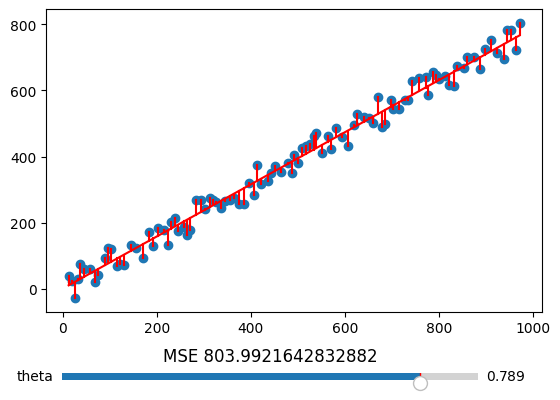

In [69]:
pred = model.predict(feats)

plt.scatter(pred, target)
plt.plot(
    *(
    [
        min(target.min(),pred.min()),
        max(target.max(), pred.max())
    ] * 2),
    c= 'red'
)

plt.show()